# Examining the correlation between expression of Basal/Classical axis and the expression of day 7 validation cNMF modules in Raghavan et al single cells

 CK, October 26 2022

 ### What this does:
 - Loads in Raghvan et al anndata from 2_preprocessing_Raghvan_scRNAseq.ipynb
 - Plots the correlations between cNMF modules and Basal/classical scores



In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.multitest import multipletests

from scipy.stats import pearsonr, spearmanr

# File paths for loading basal/classical signatures
data_path = '../1_Data/'

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"

results_file = "raghavan_data/raghavan_malignant_cells.h5ad"

In [2]:
adata  = sc.read(results_file)
high_corr_module_naming = {
                    'Module_2':"low complexity 3",
                    'Module_4':"cell cycle G2M",
                    'Module_5':"low complexity 1",
                    'Module_7':"type I IFN",
                    'Module_10':"NFKB",
                    'Module_12':"ribosomal",
                    'Module_13':"wound healing",       
                    'Module_14':"mitochondrial",
                    'Module_15':"cell cycle S phase",
                    'Module_17':"IFNgamma",
                    'Module_18':"classical",
                    'Module_20':"low complexity 2",
                    'Module_23':"TGFbeta",
}
for i in range(adata.obs.shape[1]):
    if adata.obs.columns.values[i] in high_corr_module_naming:
        adata.obs.columns.values[i] = high_corr_module_naming[adata.obs.columns.values[i]]

In [3]:
pdac_sigs = ['mClassical','scClassical','mBasal','scBasal','scIT','mBC','scBC']
modules = ["NFKB",
                 "wound healing",
                 "TGFbeta",
                 "IFNgamma",
                 "type I IFN",
                 "classical",
                 "cell cycle G2M",
                 "cell cycle S phase",
                 "ribosomal",
                 "mitochondrial",
                 "low complexity 1",
                 "low complexity 2",
                 "low complexity 3"]

corr_of_mean_sig_and_mean_module_by_patient = np.zeros((len(pdac_sigs),len(modules)))
pvals_of_mean_sig_and_mean_module_by_patient = np.zeros((len(pdac_sigs),len(modules)))
for i in range(len(pdac_sigs)):
    for j in range(len(modules)):
        corr_of_mean_sig_and_mean_module_by_patient[i,j] = pearsonr(adata.obs[pdac_sigs[i]],adata.obs[modules[j]])[0]
        pvals_of_mean_sig_and_mean_module_by_patient[i,j] = pearsonr(adata.obs[pdac_sigs[i]],adata.obs[modules[j]])[1]
corr_of_mean_sig_and_mean_module_by_patient = pd.DataFrame(corr_of_mean_sig_and_mean_module_by_patient,
                                                           index=pdac_sigs, 
                                                           columns = modules)
pvals_of_mean_sig_and_mean_module_by_patient = pd.DataFrame(pvals_of_mean_sig_and_mean_module_by_patient,
                                                           index=pdac_sigs, 
                                                           columns = modules)

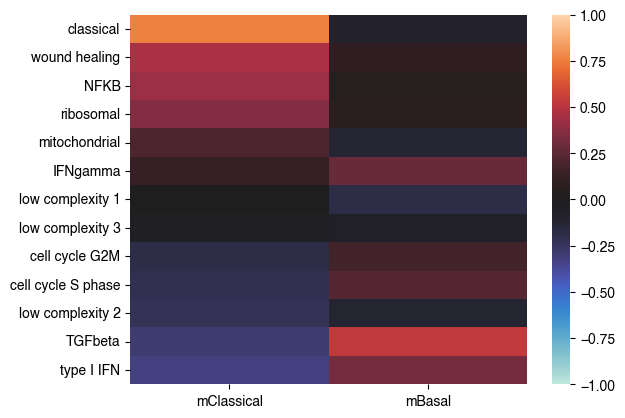

In [4]:
correlations = pd.DataFrame(corr_of_mean_sig_and_mean_module_by_patient.loc[['mClassical','mBasal']])
correlations = correlations.T.sort_values(by='mClassical',ascending=False)
sns.heatmap(correlations,vmax=1,vmin=-1,cmap='icefire')
plt.savefig("raghavan_single_cell_singature_correlations.pdf")


<AxesSubplot:>

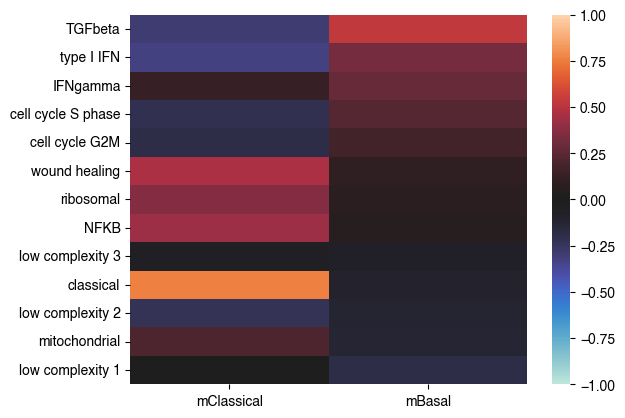

In [5]:
correlations = correlations.sort_values(by='mBasal',ascending=False)
sns.heatmap(correlations,vmax=1,vmin=-1,cmap='icefire')


In [24]:
adata.obs.to_csv("raghavan_single_cell_metadata.csv")